import libraries

In [449]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import data - csv file

In [450]:
df = pd.read_csv('Social_Network_Ads.csv').set_index('User ID')

data structure

In [451]:
df.shape

(400, 4)

In [452]:
df.sample(5)

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15753874,Female,37,80000,0
15753102,Female,35,97000,1
15815236,Female,45,131000,1
15806901,Female,57,33000,1
15813113,Male,40,107000,1


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 15624510 to 15594041
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.6+ KB


In [454]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [455]:
df.describe(include=['O'])

,Gender
count,400
unique,2
top,Female
freq,204


data insight

<Axes: xlabel='Purchased'>

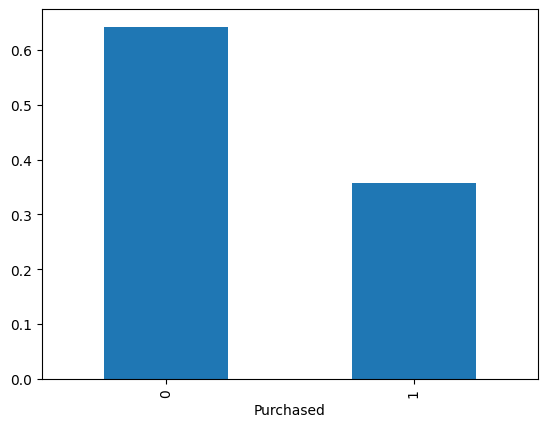

In [456]:
df.Purchased.value_counts(normalize=True).plot.bar()

<Axes: ylabel='Frequency'>

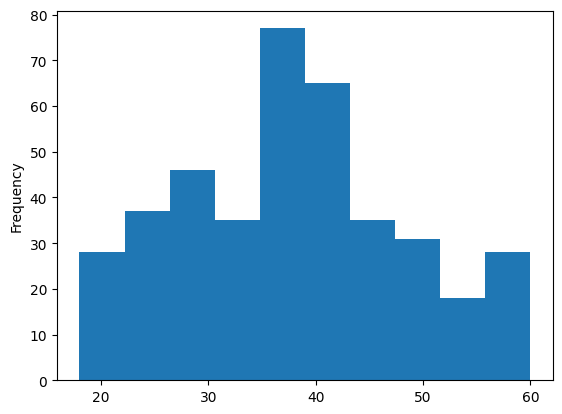

In [457]:
df.Age.plot.hist()

<Axes: >

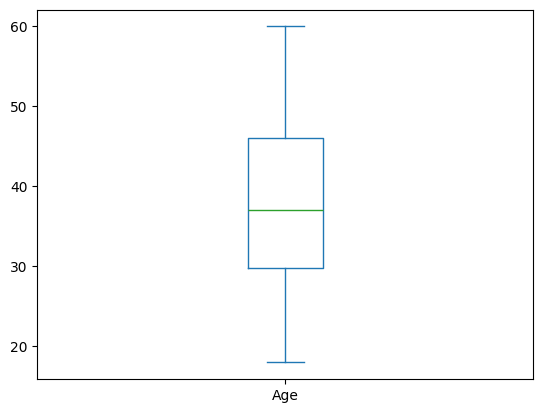

In [458]:
df.Age.plot.box()

<Axes: ylabel='Frequency'>

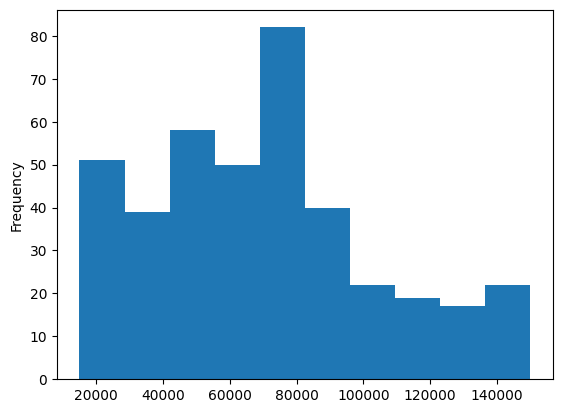

In [459]:
df.EstimatedSalary.plot.hist()

<Axes: >

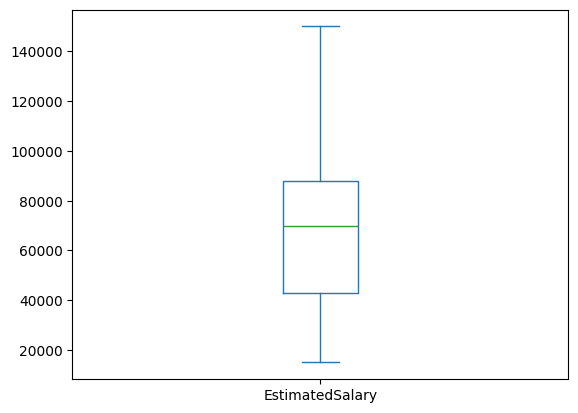

In [460]:
df.EstimatedSalary.plot.box()

In [461]:
df[['Age', 'EstimatedSalary']].corr()

,Age,EstimatedSalary
Age,1.000000,0.155238
EstimatedSalary,0.155238,1.000000


In [462]:
df[['EstimatedSalary', 'Purchased']].corr()

,EstimatedSalary,Purchased
EstimatedSalary,1.000000,0.362083
Purchased,0.362083,1.000000


In [463]:
pd.crosstab(df['Gender'], df['Purchased'], margins=True, normalize=True)

Purchased,0,1,All
Gender,,,
Female,0.3175,0.1925,0.51
Male,0.3250,0.1650,0.49
All,0.6425,0.3575,1.00


<Axes: ylabel='Purchased'>

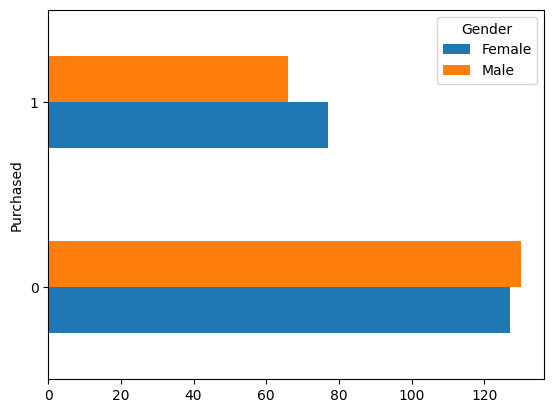

In [464]:
df.groupby(['Gender', 'Purchased']).size().unstack().T.plot(kind='barh')

In [465]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

## KNN

In [466]:
x = df[['Gender', 'Age', 'EstimatedSalary']]
x.loc[:,'Gender'] = x['Gender'].replace({'Male': 0,'Female': 1})
x = x.to_numpy()

y = df['Purchased']
y = y.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, stratify=y, random_state=50)

/var/folders/v5/rlg6qc454l99syb4x9m7q2qc0000gp/T/ipykernel_16099/531144126.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x.loc[:,'Gender'] = x['Gender'].replace({'Male': 0,'Female': 1})


In [467]:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [468]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [469]:
y_pred = knn.predict(x_test)

In [470]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0])

In [471]:
conf_mat = confusion_matrix(y_test, y_pred)

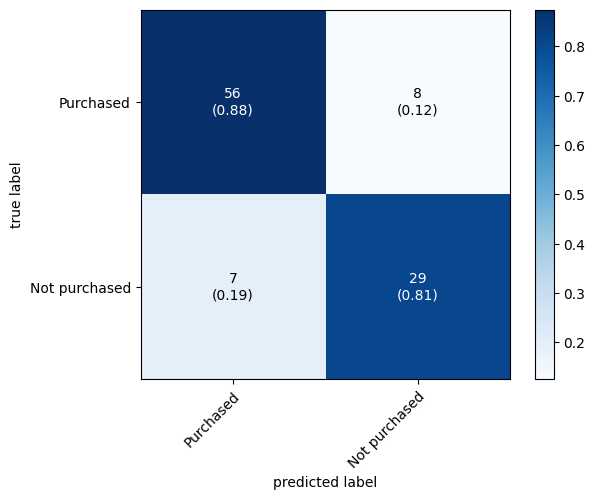

In [472]:
class_names = ['Purchased', 'Not purchased']

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=class_names)

In [473]:
knn.score(x_test, y_test)

0.85